In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [22]:
df_fat = pd.read_csv('bodyfat.csv')
df_fat

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


In [23]:

# Separar X e y
X = df_fat.drop(['BodyFat', 'Density', 'Age'], axis=1)
y = df_fat['BodyFat']
# Standarizar
scaler = StandardScaler()
X = scaler.fit_transform(X)
#y = scaler.fit_transform(y.values.reshape(-1, 1))
# Separar train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# Crear modelo
model = LinearRegression()
# Entrenar modelo
model.fit(X_train, y_train)
# Predecir
y_pred_test = model.predict(X_test)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print('Train score R^2:', train_score)
print('Test score  R^2:', test_score)
# Obtener coeficientes e intercepto
print('Coeficientes:', model.coef_)
print('Intercepto:', model.intercept_)
# Obtener MSE
print('MSE:', mean_squared_error(y_test, y_pred_test))
# Obtener RMSE
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_test)))
# Obtener MAE
print('MAE:', mean_absolute_error(y_test, y_pred_test))
# Obtener MAPE
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred_test))



Train score R^2: 0.7423277590099493
Test score  R^2: 0.7424534538392061
Coeficientes: [-2.56448819 -0.47515646 -1.0413652  -0.16060116 11.31126379 -2.28107507
  0.89916815 -0.05836313  0.08723656  0.66480828  0.84347965 -1.40044393]
Intercepto: 19.142344155731784
MSE: 16.25159505285991
RMSE: 4.031326711252749
MAE: 3.359441265692058
MAPE: 302367201544099.44


<Axes: >

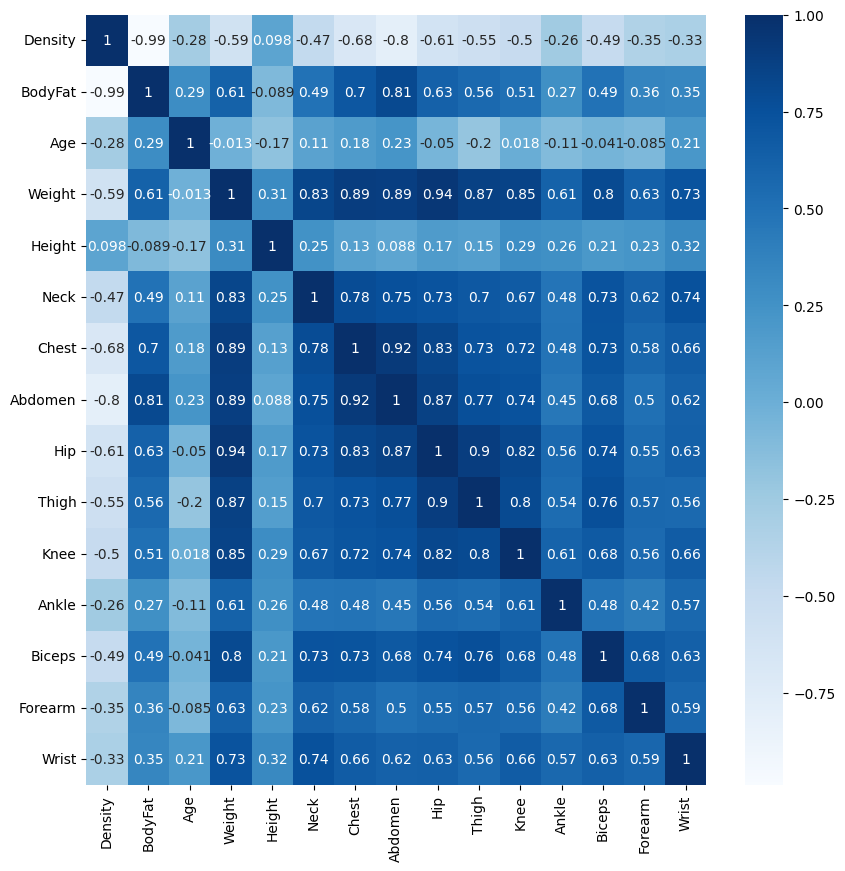

In [24]:
# matriz de correlación
corr = df_fat.corr()
# Heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='Blues')

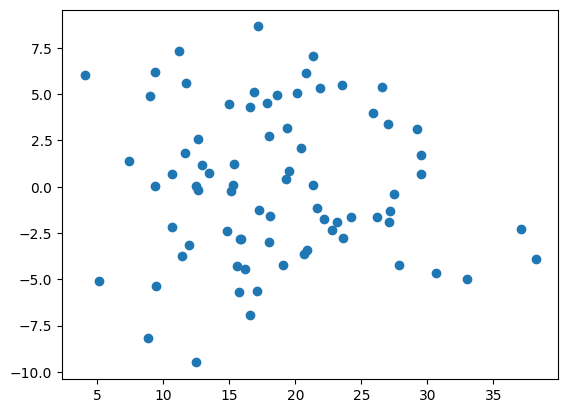

In [25]:
# Graficar residuos
residuos = y_test - y_pred_test
plt.scatter(y_pred_test, residuos)

In [26]:
X_stat = sm.add_constant(X_train)
model = sm.OLS(y_train, X_stat)
results = model.fit()
print('Sumario:  ',results.summary() )
print('Params:  ',results.params)

Sumario:                               OLS Regression Results                            
Dep. Variable:                BodyFat   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     39.13
Date:                Thu, 26 Oct 2023   Prob (F-statistic):           8.30e-42
Time:                        16:27:37   Log-Likelihood:                -507.31
No. Observations:                 176   AIC:                             1041.
Df Residuals:                     163   BIC:                             1082.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.1423      0.344     55.6

In [27]:
from sklearn.linear_model import Ridge
ridgereg = Ridge(alpha=0.1)
ridgereg.fit(X_train, y_train)
y_pred_ridge = ridgereg.predict(X_test)


In [28]:
from sklearn.linear_model import RidgeCV
# Lista de alphas de 0.001 a 1000 en pasos de 0.001
alpha_list = np.linspace(0.001, 0.1, 1000)
ridge_cv = RidgeCV(alphas=alpha_list).fit(X_train, y_train)
print('Alpha:', ridge_cv.alpha_)
print('Score:', ridge_cv.score(X_test, y_test))
print('Coeficientes:', ridge_cv.coef_)

Alpha: 0.1
Score: 0.74265126418461
Coeficientes: [-2.52965763 -0.48119566 -1.04029702 -0.13469742 11.24811688 -2.26154372
  0.88758829 -0.05734449  0.08111997  0.66060538  0.8381625  -1.39941341]


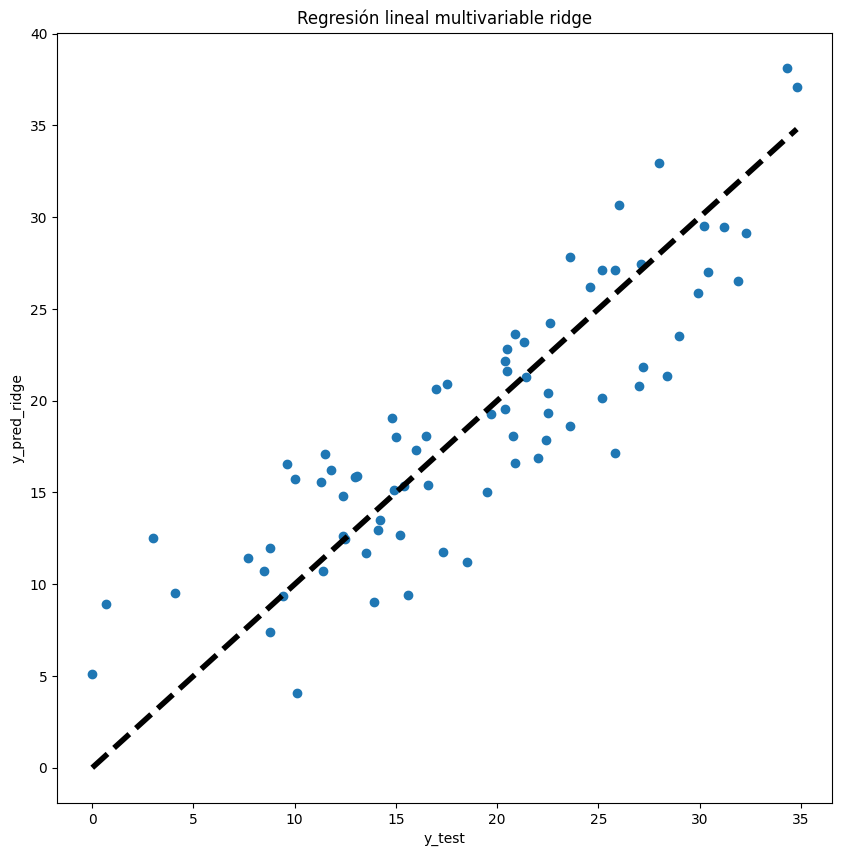

In [29]:
# Graficar regresión linal multivariable ridge
plt.figure(figsize=(10, 10))
plt.scatter(y_test, y_pred_ridge)
plt.xlabel('y_test')
plt.ylabel('y_pred_ridge')
plt.title('Regresión lineal multivariable ridge')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)


In [30]:
from sklearn.linear_model import Lasso
lassoreg = Lasso(alpha=0.1)
lassoreg.fit(X_train, y_train)
y_pred_lasso = lassoreg.predict(X_test)
from sklearn.linear_model import LassoCV    
alpha_list = np.linspace(0.001, 0.1, 1000)
lasso_cv = LassoCV(alphas=alpha_list).fit(X_train, y_train)
print('Alpha:', lasso_cv.alpha_)
print('Score:', lasso_cv.score(X_test, y_test))
print('Coeficientes:', lasso_cv.coef_)


Alpha: 0.016162162162162163
Score: 0.7441101632640186
Coeficientes: [-2.40859731e+00 -4.93605281e-01 -1.00230517e+00 -4.65385261e-03
  1.09851402e+01 -2.09875094e+00  7.36141225e-01 -0.00000000e+00
  2.72497374e-02  6.09456595e-01  7.97448424e-01 -1.39127558e+00]


In [31]:
from sklearn.linear_model import ElasticNet
elasticreg = ElasticNet(alpha=0.1, l1_ratio=0.5)
elasticreg.fit(X_train, y_train)
alpha_list = np.linspace(0.0001, 0.1, 1000)

y_pred_elastic = elasticreg.predict(X_test)
from sklearn.linear_model import ElasticNetCV
elastic_cv = ElasticNetCV(alphas=alpha_list, l1_ratio=0.5).fit(X_train, y_train)
print('Alpha:', elastic_cv.alpha_)
print('L1 ratio:', elastic_cv.l1_ratio_)
print('Score:', elastic_cv.score(X_test, y_test))
print('Coeficientes:', elastic_cv.coef_)

Alpha: 0.0007000000000000001
L1 ratio: 0.5
Score: 0.7426198176023218
Coeficientes: [-2.53969972 -0.47929675 -1.03982662 -0.14118002 11.26518619 -2.26511705
  0.88841572 -0.05620924  0.08213867  0.6610185   0.83919307 -1.39966428]


In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
n = 12
pd.DataFrame(
    {
        'variables': df_fat.columns[3:], 'VIF':[variance_inflation_factor(X, i) for i in range(n)]
    }
)

,variables,VIF
0,Weight,32.068597
1,Height,1.644955
2,Neck,4.288553
3,Chest,9.449550
4,Abdomen,9.377541
5,Hip,14.701777
6,Thigh,6.737076
7,Knee,4.321386
8,Ankle,1.887277
9,Biceps,3.600760


In [34]:
from sklearn.linear_model import Lasso, Ridge, LinearRegression, ElasticNet, LassoCV, RidgeCV, ElasticNetCV

train_score_ls = Lasso.score(X_train, y_train)
test_score_ls = Lasso.score(X_test, y_test)
print('train_score_ls: ', train_score_ls, 'test_score_ls: ', test_score_ls)

train_score_rg = Ridge.score(X_train, y_train)
test_score_rg = Ridge.score(X_test, y_test)
print('train_score_rg: ', train_score_rg, 'test_score_rg: ', test_score_rg)

train_score_lr = lr_reg.score(X_train, y_train)
test_score_lr = lr_reg.score(X_test, y_test)
print('train_score_lr: ', train_score_lr, 'test_score_lr: ', test_score_lr)


TypeError: RegressorMixin.score() missing 1 required positional argument: 'y'

In [35]:
alps = 10**np.linspace(-2, 2, 50)
alps

array([1.00000000e-02, 1.20679264e-02, 1.45634848e-02, 1.75751062e-02,
       2.12095089e-02, 2.55954792e-02, 3.08884360e-02, 3.72759372e-02,
       4.49843267e-02, 5.42867544e-02, 6.55128557e-02, 7.90604321e-02,
       9.54095476e-02, 1.15139540e-01, 1.38949549e-01, 1.67683294e-01,
       2.02358965e-01, 2.44205309e-01, 2.94705170e-01, 3.55648031e-01,
       4.29193426e-01, 5.17947468e-01, 6.25055193e-01, 7.54312006e-01,
       9.10298178e-01, 1.09854114e+00, 1.32571137e+00, 1.59985872e+00,
       1.93069773e+00, 2.32995181e+00, 2.81176870e+00, 3.39322177e+00,
       4.09491506e+00, 4.94171336e+00, 5.96362332e+00, 7.19685673e+00,
       8.68511374e+00, 1.04811313e+01, 1.26485522e+01, 1.52641797e+01,
       1.84206997e+01, 2.22299648e+01, 2.68269580e+01, 3.23745754e+01,
       3.90693994e+01, 4.71486636e+01, 5.68986603e+01, 6.86648845e+01,
       8.28642773e+01, 1.00000000e+02])

In [37]:
lambs = 10**np.linspace(-2, 0, 50)
lambs

array([0.01      , 0.01098541, 0.01206793, 0.01325711, 0.01456348,
       0.01599859, 0.01757511, 0.01930698, 0.02120951, 0.02329952,
       0.02559548, 0.02811769, 0.03088844, 0.03393222, 0.03727594,
       0.04094915, 0.04498433, 0.04941713, 0.05428675, 0.05963623,
       0.06551286, 0.07196857, 0.07906043, 0.08685114, 0.09540955,
       0.10481131, 0.11513954, 0.12648552, 0.13894955, 0.1526418 ,
       0.16768329, 0.184207  , 0.20235896, 0.22229965, 0.24420531,
       0.26826958, 0.29470517, 0.32374575, 0.35564803, 0.39069399,
       0.42919343, 0.47148664, 0.51794747, 0.5689866 , 0.62505519,
       0.68664885, 0.75431201, 0.82864277, 0.91029818, 1.        ])

In [38]:
lasso_cv = LassoCV(alphas=alps, random_state=0).fit(X_train, y_train)
print("lasso_coef: ", lasso_cv.coef_)

lasso_cv.score(X_test, y_test)
lasso_cv.score(X_train, y_train)

print('lasso_coef: ', lasso_cv.alpha_)

elastic_cv = ElasticNetCV(alphas=alps, l1_ratio=0.5, cv = 10).fit(X_train, y_train)
print("elastic_coef: ", elastic_cv.alpha_)

lasso_coef:  [-2.38675119 -0.49578537 -0.99908632 -0.         10.96190268 -2.08426799
  0.72172742 -0.          0.02226714  0.60469568  0.79395562 -1.3897772 ]
lasso_coef:  0.017575106248547922
elastic_coef:  0.01


In [39]:
elastic_cv = ElasticNetCV(alphas=alps, l1_ratio=lambs, cv = 10).fit(X_train, y_train)
print("elastic_coef: ", elastic_cv.alpha_, 'elastic alpha coef', elastic_cv.l1_ratio_)
elastic_cv.coef_

elastic_coef:  0.054286754393238594 elastic alpha coef 1.0


array([-1.84438974, -0.55905293, -0.87968413, -0.        , 10.47085133,
       -1.72296212,  0.31292134, -0.        , -0.        ,  0.48618533,
        0.71196168, -1.38766494])

In [40]:
from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(alphas = alps).fit(X_train, y_train)
print('ridge_coef: ', ridge_cv.coef_)

print('score ridge x_train: ', ridge_cv.score(X_train, y_train))
print('score ridge x_test: ', ridge_cv.score(X_test, y_test))

ridge_coef:  [-2.5163257  -0.48351566 -1.03986106 -0.12471488 11.22376711 -2.25396852
  0.88314278 -0.05694491  0.07876626  0.65898482  0.83611185 -1.39900431]
score ridge x_train:  0.7423147589066682
score ridge x_test:  0.7427248016186728


In [41]:
print('score lasso x_test: ', lasso_cv.score(X_test, y_test))
print('score lasso x_train: ', lasso_cv.score(X_train, y_train))

print('coef lasso: ', lasso_cv.coef_)

score lasso x_test:  0.7441876619969381
score lasso x_train:  0.742011030672874
coef lasso:  [-2.38675119 -0.49578537 -0.99908632 -0.         10.96190268 -2.08426799
  0.72172742 -0.          0.02226714  0.60469568  0.79395562 -1.3897772 ]


In [42]:
x_stat = sm.add_constant(X_train)
model = sm.OLS(y_train, x_stat)

results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                BodyFat   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     39.13
Date:                Thu, 26 Oct 2023   Prob (F-statistic):           8.30e-42
Time:                        16:31:47   Log-Likelihood:                -507.31
No. Observations:                 176   AIC:                             1041.
Df Residuals:                     163   BIC:                             1082.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.1423      0.344     55.673      0.0

In [43]:
import sklearn
print(sklearn.__version__)

1.3.0


In [44]:
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor()
ransac.fit(X_train, y_train)
y_pred_ransac = ransac.predict(X_test)
print('score ransac: ', ransac.score(X_test, y_test))


score ransac:  0.5779415415154209


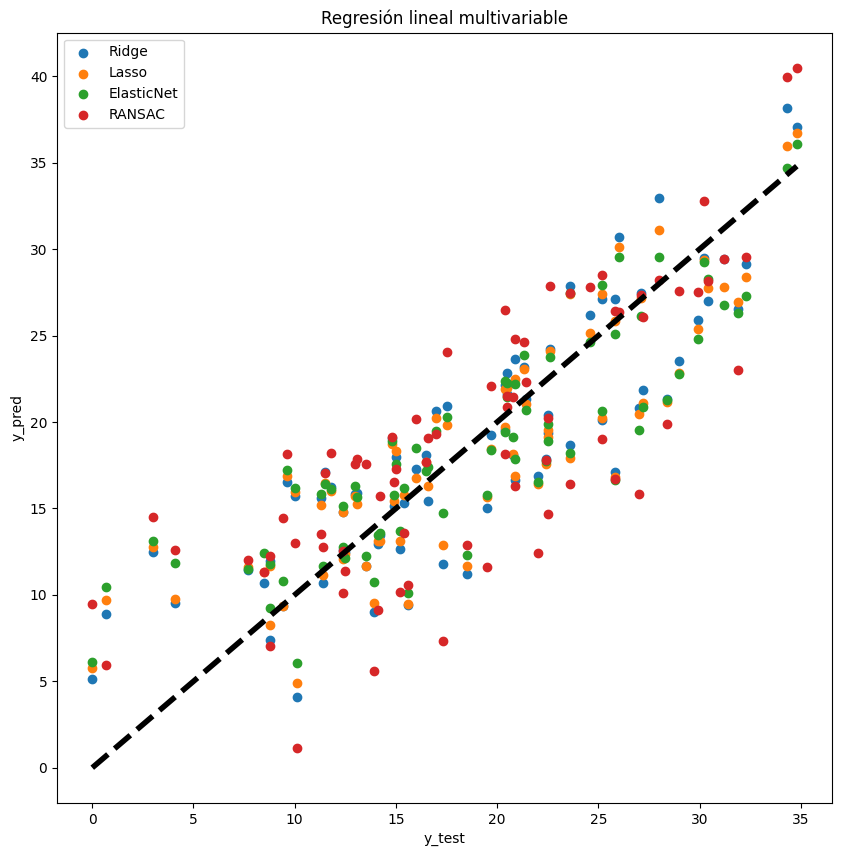

In [45]:
#Grafica como se ajustan los diferentes modelos
plt.figure(figsize=(10, 10))
plt.scatter(y_test, y_pred_ridge, label='Ridge')
plt.scatter(y_test, y_pred_lasso, label='Lasso')
plt.scatter(y_test, y_pred_elastic, label='ElasticNet')
plt.scatter(y_test, y_pred_ransac, label='RANSAC')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('Regresión lineal multivariable')
plt.legend()
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.show()

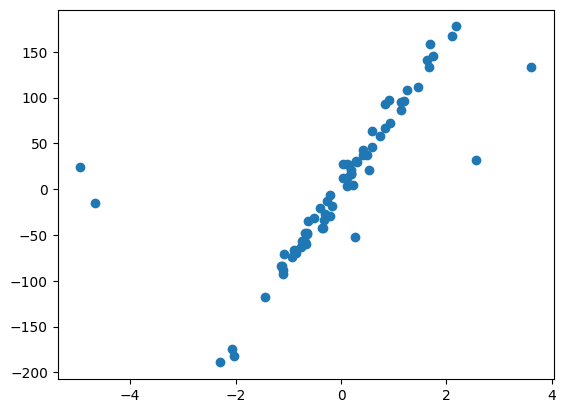

In [46]:
from sklearn.datasets import make_regression
def get_dataset():
    x, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=1)
    for i in range(10):
        factor = np.random.randint(1, 6)
        if np.random.random() > 0.5:
            x[i] += factor * x.std()
        else:
            x[i] -= factor * x.std()
    return x,y
x,y = get_dataset()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

plt.scatter(x_train, y_train)
plt.show()

In [58]:
model_lr = LinearRegression()
results_lr = model_lr.fit(x_train, y_train)
y_pred_lr = model_lr.predict(x)

from sklearn.linear_model import HuberRegressor
model_h = HuberRegressor(epsilon=1.35)
results_h = model_h.fit(x_train,y_train)
y_pred_h = model_h.predict(x)

model_ran = RANSACRegressor()
results_ran = model_ran.fit(x_train, y_train)
y_pred_ran = model_ran.predict(x)

from sklearn.linear_model import TheilSenRegressor
model_t = TheilSenRegressor()
result_t = model_t.fit(x_train, y_train)
y_pred_t = model_t.predict(x)


model_l = LassoCV(alphas = alps)
result_l = model_l.fit(x_train, y_train)
y_pred_l = model_l.predict(x)

model_els = ElasticNet().fit(x_train, y_train)
y_pred_els = model_els.predict(x)

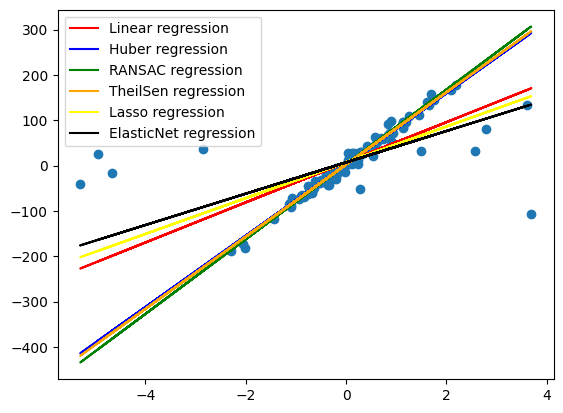

In [59]:
plt.figure()
plt.scatter(x, y)
plt.plot(x, y_pred_lr, color = 'red', label = 'Linear regression')
plt.plot(x, y_pred_h, color = 'blue', label = 'Huber regression')
plt.plot(x, y_pred_ran, color = 'green', label = 'RANSAC regression')
plt.plot(x, y_pred_t, color = 'orange', label = 'TheilSen regression')
plt.plot(x, y_pred_l, color = 'yellow', label = 'Lasso regression')
plt.plot(x, y_pred_els, color = 'black', label = 'ElasticNet regression')
plt.legend()

In [56]:
print("lasso_coef: ", model_l.coef_)
print('lasso_alpha: ', model_l.alpha_)

lasso_coef:  [39.52034812]
lasso_alpha:  8.68511373751352
